# **H20 AutoML Bank Loan**

# **Abstract**

This dataset has data about 5000 customers and the information includes the customer's age, income, and other demographics; the customer's relationship with the bank; and the customer's response to the most recent personal loan campaign (Personal Loan). Only 480 (or 9.6%) of these 5000 clients accepted the personal loan that was presented to them during the previous campaign.

Here's information regarding the attributes of the dataset: Attribute Information:

1.ID : Customer ID

2.Age : Customer's age in completed years

3.Experience : #years of professional experience

4.Income : Annual income of the customer ($000)

5.ZIP Code : Home Address ZIP code.

6.Family : Family size of the customer

7.CCAvg : Avg. spending on credit cards per month ($000)

8.Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

9.Mortgage : Value of house mortgage if any. ($000)

10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?

11.Securities Account : Does the customer have a securities account with the bank?

12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

13.Online : Does the customer use internet banking facilities?

14.Credit card : Does the customer use a credit card issued by ID



# Installing all the required libraries for the Assignment


In [ ]:
#installing dependencies
!pip install eli5
!pip install h2o 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c8dac02b9f42dd853206571714bd245c184042303f2b020d365d740d49c3b303
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 4.0 MB/s eta 0:00:00


# Importing Libraries

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:

min_mem_size=6 
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
     

6


In [ ]:

port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:30372..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp0idr803c
  JVM stdout: /tmp/tmp0idr803c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp0idr803c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:30372
Connecting to H2O server at http://127.0.0.1:30372 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_4ihlzk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Import the processed data from notebook

In [ ]:

# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/RiddhiVora23/Data_Science/main/Bank_Personal_Loan_Modelling.csv"
df = h2o.import_file(path = url)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:

df.head()

ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1,2,0,0,0,0,0,1
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
df.describe()

Rows:5000
Cols:14

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
type,int,int,int,int,int,int,real,int,int,int,int,int,int,int
mins,1.0,23.0,-3.0,8.0,9307.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2500.5,45.338400000000014,20.104600000000005,73.77419999999996,93152.503,2.3964000000000003,1.937937999999999,1.881,56.49880000000001,0.096,0.1044,0.0604,0.5968,0.294
maxs,5000.0,67.0,43.0,224.0,96651.0,4.0,10.0,3.0,635.0,1.0,1.0,1.0,1.0,1.0
sigma,1443.5200033252052,11.463165630542667,11.467953681120555,46.03372932108631,2121.8521973362012,1.1476630455378525,1.7476589800467677,0.8398690826641989,101.71380210211204,0.29462070577617994,0.3058093260003261,0.23825027311322794,0.490589334962671,0.45563748869492826
zeros,0,0,66,0,0,0,106,0,3462,4520,4478,4698,2016,3530
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


The above numbers makes sense, for example the number of rooms, minimum is one and mean is 2500 and max is 5000. Plotting interactive map to undestand the location of the houses on the map.


Except for the experience, all of the variable ranges in this dataset make sense.

# Create train/test split

In [ ]:
# Create train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(3981, 14)
(1019, 14)


In [ ]:
#Display all columns in X
X=df.columns
print(X)

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [ ]:

#Seperate Dependent variable from Independent variable
y_numeric ='Personal Loan'
X.remove(y_numeric) 
print(X)

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


# **H20 AutoML Execution**


In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
df_train['Personal Loan'] = df_train['Personal Loan'].asfactor()

In [ ]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20230301_51635


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    76                 76                          53137                  7            7            7             31            79            50.9211

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00023321239276643816
RMSE: 0.015271293094117412
LogLoss: 0.003608417680312947
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7154628021077687
       0     1    Error    Rate
-----  ----  ---  -------  ------------
0      3600  0    0        (0.0/3600.0)
1      0     381  0        (0.0/381.0)
Total  3600  381  0        (0.0/3981.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.715463     1         168
max f2                       0.715463     1         168
max f0point5                 0.715463     1         168
max accuracy                 0.715463     1         168
max precision                0.999364     1         0
max recall                   0.715463     1         168
max specificity              0.999364     1         0
max absolute_mcc             0.715463     1         168
max min_per_class_accuracy   0.715463     1         168
max mean_per_class_accuracy  0.715463     1         168
max tns                      0.999364     3600      0
max fns                      0.999364     379       0
max fps                      9.50102e-05  3600      399
max tps                      0.715463     381       168
max tnr                      0.999364     1         0
max fnr                      0.999364     0.994751  0
max fpr                      9.50102e-05  1         399
max tpr                      0.715463     1         168

Gains/Lift Table: Avg response rate:  9.57 %, avg score:  9.56 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100477                   0.99864            10.4488  10.4488            1                0.998979     1                           0.998979            0.104987        0.104987                   944.882  944.882            0.104987
2        0.0200955                   0.998045           10.4488  10.4488            1                0.998379     1                           0.998679            0.104987        0.209974                   944.882  944.882            0.209974
3        0.0301432                   0.997296           10.4488  10.4488            1                0.997725     1                           0.998361            0.104987        0.314961                   944.882  944.882            0.314961
4        0.0401909                   0.996402           10.4488  10.4488            1                0.996801     1                           0.997971            0.104987        0.419948                   944.882  944.882            0.419948
5        0.0502386                   0.995391           10.4488  10.4488            1                0.995967     1                           0.99757             0.104987        0.524934                   944.882  944.

Defining all the terms used:

1, MAE:Mean Absolute Error is referred to as MAE. The average absolute difference between predicted and actual values is a commonly used metric in machine learning and statistics. The average of the absolute differences between the predicted and actual values is used to calculate MAE. It can be used to assess the effectiveness of regression models whose objective is to reduce the discrepancy between predicted and actual values. The model performs better at predicting the target variable when the MAE is lower.
And here, we have recived MAE 0.030 which seems low.

2.MSE:Mean Squared Error is referred to as MSE. The average squared difference between predicted values and actual values is a common metric in machine learning and statistics. The average of the squared differences between the predicted and actual values is used to calculate MSE. It is also used to assess the effectiveness of regression models, whose objective is to reduce the discrepancy between expected and observed values.
distribution of the response variable in the GLM.
The value we got is 0.0096985.

3.The mean residual deviance: It deviance is a metric used to evaluate the performance of a statistical model, particularly in the context of generalized linear models (GLMs). It is similar to the mean squared error (MSE) used in linear regression models, but is adjusted for the specific distribution of the response variable in the GLM.
The value we got is 0.0096985.

4.r2:r2: The Pearson correlation coefficient between the labels and expected values is expressed as r squared (r2). This metric has a value between 0 and 1; a higher value denotes a better model.
The value we got is 0.8893507.



5.Root Mean Square: Root Mean Squared Error is referred to as RMSE. It is a widely used metric in statistics and machine learning to assess how well a regression model performs. The mean squared error (MSE), which calculates the average squared difference between the predicted and actual values of the target variable, is translated into the root mean square error (RMSE).
The value we got is 0.0971795	

In [ ]:
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error       rmse         mse
GBM_2_AutoML_1_20230301_51635                           0.997329  0.0386841  0.98097                0.0433213  0.101022   0.0102054
StackedEnsemble_AllModels_1_AutoML_1_20230301_51635     0.997287  0.0353904  0.981059               0.0383497  0.0990063  0.00980224
GBM_4_AutoML_1_20230301_51635                           0.997255  0.040646   0.980923               0.0491885  0.102205   0.0104458
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_51635  0.997235  0.03549    0.980661               0.0374541  0.0992813  0.00985678
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_51635  0.997132  0.0357603  0.980239               0.0362806  0.0994944  0.00989913
StackedEnsemble_AllModels_2_AutoML_1_20230301_51635     0.997111  0.0360051  0.980242               0.0384886  0.0995534  0.00991088
StackedEnsemble_AllModels_3_AutoML_1_20230301_51635     0.997083  0.035

The StackedEnsemble_AllModels_2_AutoML_2_20230301_23923 is having the best performance with rsme=0.102375, mse=0.0104806 and mae= 0.03227254 and GBM_grid_1_AutoML_2_20230301_23923_model_5 with rsme = 0.107643, mse= 0.0115871 and mae 0.0323345 is not perfroming well.

# **Q. Showing which model performed well**

In [ ]:
best_model = aml.leader
best_model.model_performance(df_train)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.00023321239562215597
RMSE: 0.015271293187616953
LogLoss: 0.0036084176072744435
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7154628616291171
       0     1    Error    Rate
-----  ----  ---  -------  ------------
0      3600  0    0        (0.0/3600.0)
1      0     381  0        (0.0/381.0)
Total  3600  381  0        (0.0/3981.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.715463     1         168
max f2                       0.715463     1         168
max f0point5                 0.715463     1         168
max accuracy                 0.715463     1         168
max precision                0.999364     1         0
max recall                   0.715463     1         168
max specificity              0.999364     1         0
max absolute_mcc             0.715463     1         168
max min_per_class_accuracy   0.715463     1         168
max mean_per_class_accuracy  0.715463     1         168
max tns                      0.999364     3600      0
max fns                      0.999364     379       0
max fps                      9.50102e-05  3600      399
max tps                      0.715463     381       168
max tnr                      0.999364     1         0
max fnr                      0.999364     0.994751  0
max fpr                      9.50102e-05  1         399
max tpr                      0.715463     1         168

Gains/Lift Table: Avg response rate:  9.57 %, avg score:  9.56 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100477                   0.99864            10.4488  10.4488            1                0.998979     1                           0.998979            0.104987        0.104987                   944.882  944.882            0.104987
2        0.0200955                   0.998045           10.4488  10.4488            1                0.998379     1                           0.998679            0.104987        0.209974                   944.882  944.882            0.209974
3        0.0301432                   0.997296           10.4488  10.4488            1                0.997725     1                           0.998361            0.104987        0.314961                   944.882  944.882            0.314961
4        0.0401909                   0.996402           10.4488  10.4488            1                0.996801     1                           0.997971            0.104987        0.419948                   944.882  944.882            0.419948
5        0.0502386                   0.995391           10.4488  10.4488            1                0.995967     1                           0.99757             0.104987        0.524934                   944.882  944.882            0.524934
6        0.100226                    0.0632487          9.5037   9.97744            0.909548         0.883348     0.954887                    0.940602            0.475066        1                          850.37   897.744            0.995
7        0.150214                    0.00457907         0        6.65719            0                0.0180125    0.637124                    0.633587            0               1                          -100     565.719            0.939722
8        0.200201                    0.00147889         0        4.99498            0               

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20230301_51635


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    76                 76                          53137                  7            7            7             31            79            50.9211

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00023321239276643816
RMSE: 0.015271293094117412
LogLoss: 0.003608417680312947
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7154628021077687
       0     1    Error    Rate
-----  ----  ---  -------  ------------
0      3600  0    0        (0.0/3600.0)
1      0     381  0       

In [ ]:
best_model.model_performance(df_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.009058295677713641
RMSE: 0.09517507907910369
LogLoss: 0.030168935587996534
Mean Per-Class Error: 0.037527448397013614
AUC: 0.99889108476065
AUCPR: 0.9905123461158001
Gini: 0.9977821695213

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3282481825520713
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      916  4    0.0043   (4.0/920.0)
1      7    92   0.0707   (7.0/99.0)
Total  923  96   0.0108   (11.0/1019.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.328248     0.94359   92
max f2                       0.048861     0.964567  108
max f0point5                 0.701915     0.970655  82
max accuracy                 0.477635     0.989205  88
max precision                0.999225     1         0
max recall                   0.0230351    1         119
max specificity              0.999225     1         0
max absolute_mcc             0.328248     0.937758  92
max min_per_class_accuracy   0.048861     0.984783  108
max mean_per_class_accuracy  0.048861     0.987341  108
max tns                      0.999225     920       0
max fns                      0.999225     98        0
max fps                      9.54138e-05  920       399
max tps                      0.0230351    99        119
max tnr                      0.999225     1         0
max fnr                      0.999225     0.989899  0
max fpr                      9.54138e-05  1         399
max tpr                      0.0230351    1         119

Gains/Lift Table: Avg response rate:  9.72 %, avg score:  9.04 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0107949                   0.998178           10.2929  10.2929            1                0.998763     1                           0.998763            0.111111        0.111111                   929.293   929.293            0.111111
2        0.0206084                   0.997665           10.2929  10.2929            1                0.997929     1                           0.998366            0.10101         0.212121                   929.293   929.293            0.212121
3        0.030422                    0.996807           10.2929  10.2929            1                0.9972       1                           0.99799             0.10101         0.313131                   929.293   929.293            0.313131
4        0.0402355                   0.994562           10.2929  10.2929            1                0.995966     1                           0.997496            0.10101         0.414141                   929.293   929.293            0.414141
5        0.0500491                   0.990748           10.2929  10.2929            1                0.992735     1                           0.996563            0.10101         0.515152                   929.293   929.293            0.515152
6        0.100098                    0.137087           8.67835  9.48564            0.843137         0.769495     0.921569                    0.883029            0.434343        0.949495                   767.835   848.564            0.940799
7        0.150147                    0.00559601         1.00911  6.66013            0.0980392        0.0314443    0.647059                    0.599167            0.0505051       1                          0.911071  566.013            0.941304
8        0.200196                    0.00171

From the above three observations, we can see that **`StackedEnsemble`** worked well in this dataset. hence, this model make sense.

# Q.In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.


In [ ]:
%matplotlib inline

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

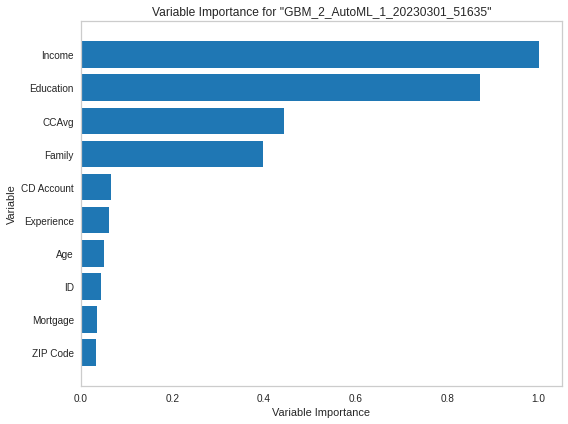

In [ ]:
explain_model = aml.explain(frame = df_test, figsize = (8,6),include_explanations=['varimp'])

From the above observation, we can see that The column **"Income"** is the most Important variable and **"Mortgage"** is the least important variable.

# Q. Is there any multicollinearity in the model?

In [65]:
type(pandas_df)

pandas.core.frame.DataFrame

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = pandas_df[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
        'Securities Account','CD Account','Online','CreditCard']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature          VIF
0                  Age  1275.003941
1           Experience   314.671866
2               Income     6.596020
3             ZIP Code   365.037483
4               Family     5.539556
5                CCAvg     3.853495
6            Education     6.700571
7             Mortgage     1.375801
8   Securities Account     1.269672
9           CD Account     1.415026
10              Online     2.578496
11          CreditCard     1.568796


Multicollinearity: Multicollinearity occurs when two or more predictor variables are highly correlated with each other. This can lead to inflated standard errors and unstable coefficients. One way to check for multicollinearity is to calculate the variance inflation factor (VIF) for each predictor variable.


Usually the values should lie in the range of 1 to 10 where 1 works well as it has least value of collinearity meaning and 10 doesn't work that well as it has collinearity.


Mortgage, Personal Loan, Securities Account, CD Account, credit card and Online works well because they have less collinearity.

# Q. Does the model make sense?

In [ ]:
pandas_df=df.cor()

pandas_df = df.as_data_frame()


Text(0.5, 1.0, 'Variable Correlation')

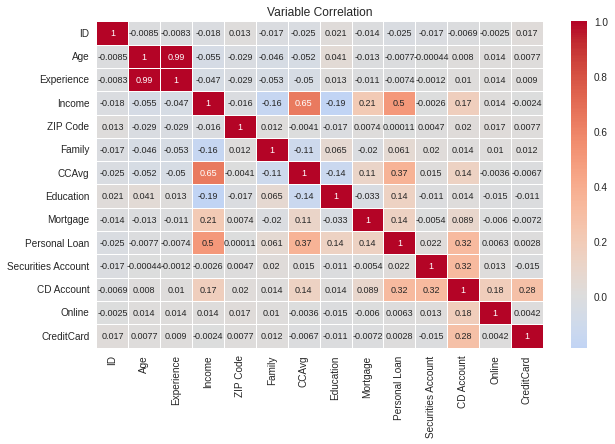

In [ ]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(pandas_df.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Here, r2, rmse, mae these values are making sense in the model.

Correlations also shows that dependent valriables are dependent on each other.

H2O Auto ML


In [ ]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df1=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_2_AutoML_1_20230301_51635': 0, 'GLM_1_AutoML_1_20230301_51635': 28}

In [ ]:

#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [ ]:
best_model1.algo

'gbm'

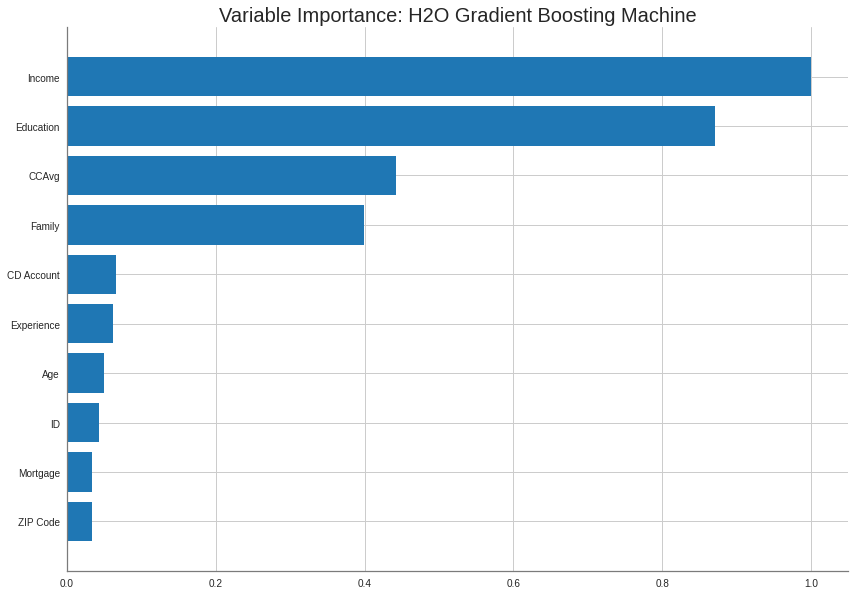

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

# Q. Are any model assumptions violated?

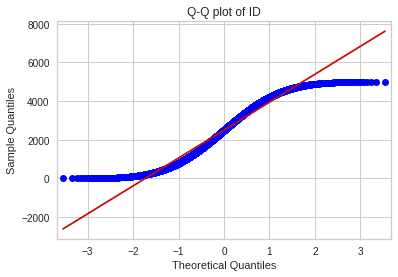

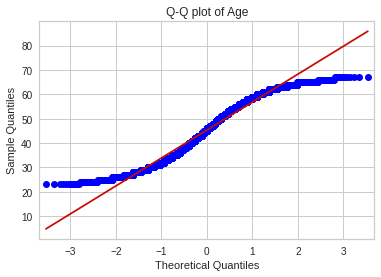

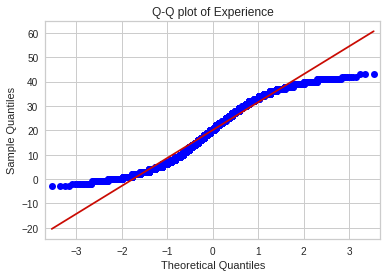

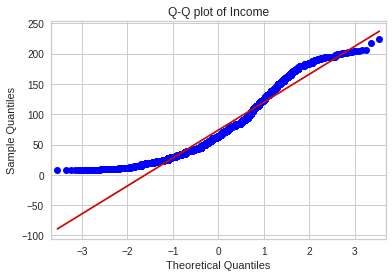

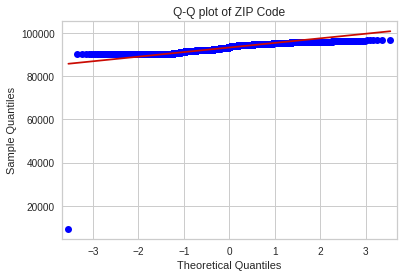

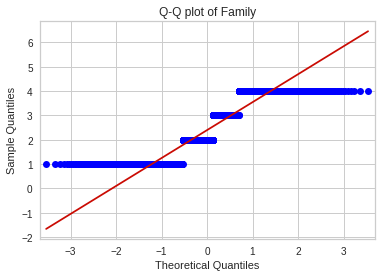

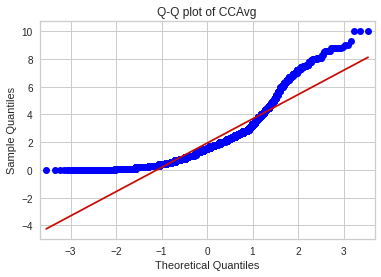

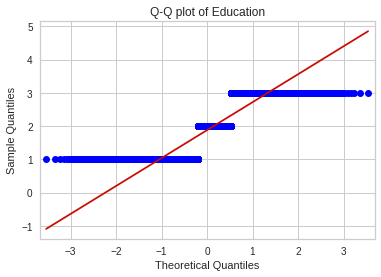

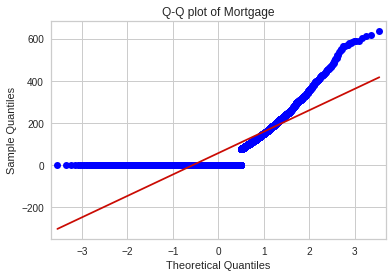

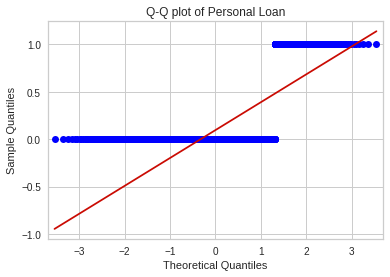

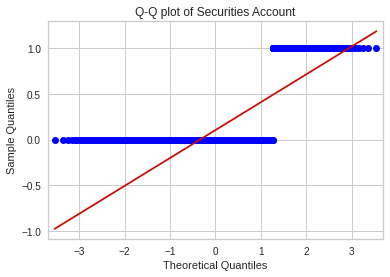

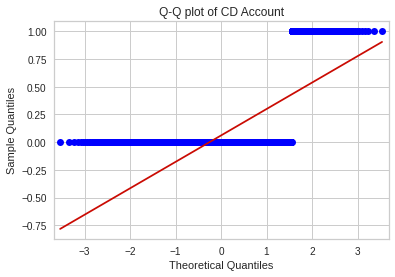

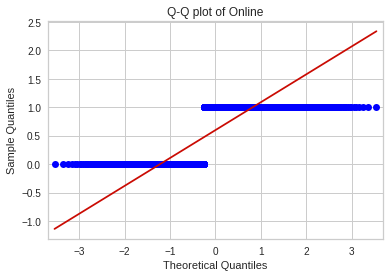

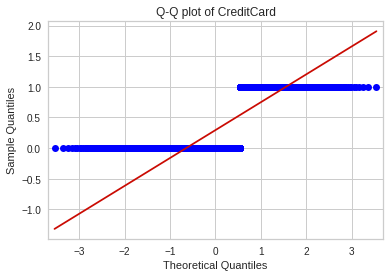

In [ ]:
import statsmodels.api as sm
for col in pandas_df.columns:
    sm.qqplot(pandas_df[col], line='s')
    plt.title('Q-Q plot of ' + col)
    plt.show()

Features like family, Education, Mortgage,Personal Loan, Secirities Account, CD Account, Online, Credit card are not following the assumption of the model.

In [ ]:
#Seperating the predictor and target variables
A=pandas_df.drop(['Personal Loan'],axis=1)
B=pandas_df['Personal Loan']

In [ ]:
#Splitting the data
X_train, X_test = train_test_split(pandas_df,test_size=0.25, random_state=1)

In [ ]:
cols1 = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
X_train_with_const = sm.add_constant(X_train[cols1])
model1 = sm.OLS(X_train['Personal Loan'], X_train_with_const).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal Loan   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:35:06   Log-Likelihood:                 222.93
No. Observations:                3750   AIC:                            -419.9
Df Residuals:                    3737   BIC:                            -338.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3723      0.175     -2.122      0.034      -0.716      -0.028
Age                   -0.0057      0.003     -1.803      0.071      -0.012       0.001
Experience             0.0060      0.003      1.882      0.060      -0.000       0.012
Income                 0.0029      0.000     25.981      0.000       0.003       0.003
ZIP Code            1.627e-06   1.67e-06      0.972      0.331   -1.66e-06    4.91e-06
Family                 0.0321      0.003      9.707      0.000       0.026       0.039
CCAvg                  0.0146      0.003      5.178      0.000       0.009       0.020
Education              0.0780      0.005     16.586      0.000       0.069       0.087
Mortgage            9.327e-05   3.82e-05      2.441      0.015    1.84e-05       0.000
Securities Account    -0.0701      0.013     -5.326      0.000      -0.096      -0.044
CD Account             0.3195      0.018     17.678      0.000       0.284       0.355
Online                -0.0247      0.008     -3.188      0.001      -0.040      -0.009
CreditCard            -0.0417      0.009     -4.851      0.000      -0.058      -0.025
==============================================================================
Omnibus:                     1001.950   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2689.486
Skew:                           1.420   Prob(JB):                         0.00
Kurtosis:                       6.025   Cond. No.                     4.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
b_pred = model1.predict(sm.add_constant(X_train[cols1]))

In [ ]:
b_pred


3186    0.142233
632     0.499114
577     0.296525
2406   -0.072872
4686    0.145384
          ...   
2895    0.056798
2763   -0.120079
905    -0.203453
3980    0.183302
235     0.180432
Length: 3750, dtype: float64

In [ ]:
residuals = X_train['Personal Loan']-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.18053596528019e-13


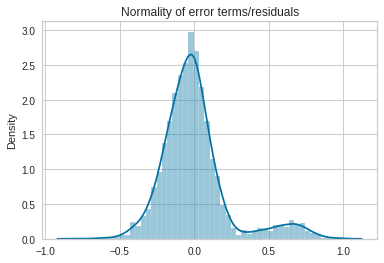

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

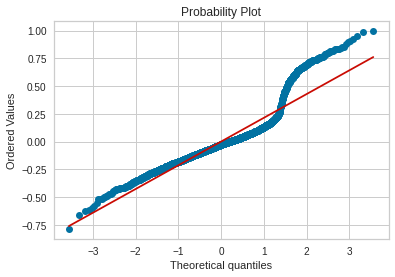

In [ ]:
import pylab 
import scipy.stats as stats   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

The outcome should ideally be scattered and devoid of any kind of pattern for the scatterplot. Plotting the same as a distplot should result in a bell-curve pattern. Both plots display the anticipated outcome, proving that the assumptions are true.

# Q. Does regularization help?

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

loan_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
loan_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
loan_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
loan_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
hf = h2o.H2OFrame(X_train)

predictor = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
y = 'Personal Loan'
lambda_search = loan_glm_regularization_lamba_search.train(x=predictor, y=y, training_frame=hf)
lambda_search

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677647774749_3523


GLM Model: summary
    family    link      regularization                                lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.00176 )  nlambda = 100, lambda.max = 0.2935, lambda.min = 0.00176, lambda.1se = -1.0  12                            11                             56                      Key_Frame__upload_bb5cfa71584b49149b73ec8a0e2747b4.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.05204227774411075
RMSE: 0.22812776627168985
MAE: 0.1546571072851067
RMSLE: 0.16918545620804298
Mean Residual Deviance: 0.05204227774411075
R^2: 0.3865763009092188
Null degrees of freedom: 3749
Residual degrees of freedom: 3738
Null deviance: 318.14639999999997
Residual deviance: 195.1585415404153
AIC: -415.83171543814905

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train        alpha    iterations    training_rmse        training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  --------------------  -------  ------------  -------------------  -------------------  ------------------  ------------------
     2023-03-01 05:35:28  0.000 sec   1            .29E0     1             0.08483903999999999   0.5
     2023-03-01 05:35:28  0.006 sec   2            .27E0     2             0.08159455922433695   0.5
     2023-03-01 05:35:28  0.008 sec   3            .24E0     2             0.07881061602177554   0.5
     2023-03-01 05:35:28  0.011 sec   4            .22E0     2             0.07642806642524222   0.5
     2023-03-01 05:35:28  0.013 sec   5            .2E0      2             0.07439397978707793   0.5
     2023-03-01 05:35:28  0.017 sec   6            .18E0     2             0.0726612997258915    0.5
     2023-03-01 05:35:28  0.021 sec   7            .17E0     2             0.07118909055932698   0.5
     2023-03-01 05:35:28  0.029 sec   8            .15E0     3             0.06936338876744648   0.5
     2023-03-01 05:35:28  0.032 sec   9            .14E0     3             0.06766292724989206   0.5
     2023-03-01 05:35:28  0.037 sec   10           .13E0     3             0.0662289426802901    0.5
---  ---                  ---         ---          ---       ---           ---                   ---      ---           ---                  ---                  ---                 ---
     2023-03-01 05:35:29  0.156 sec   47           .41E-2    12            0.052087498360658624  0.5
     2023-03-01 05:35:29  0.163 sec   48           .37E-2    12            0.0520780934268439    0.5
     2023-03-01 05:35:29  0.165 sec   49           .34E-2    12            0.05207021392031834   0.5
     2023-03-01 05:35:29  0.167 sec   50           .31E-2    12            0.052063730087560905  0.5
     2023-03-01 05:35:29  0.169 sec   51           .28E-2    12            0.052058352877868086  0.5
     2023-03-01 05:35:29  0.170 sec   52           .26E-2    12            0.05205386477331278   0.5
     2023-03-01 05:35:29  0.172 sec   53           .23E-2    12            0.05205012100883466   0.5
     2023-03-01 05:35:29  0.174 sec   54           .21E-2    12            0.05204700994675633   0.5
     2023-03-01 05:35:29  0.176 sec   55           .19E-2    12            0.052044425500736034  0.5
     2023-03-01 05:35:29  0.177 sec   56           .18E-2    12            0.05204227774411096   0.5      56   

Ridge Regularization

In [ ]:
hf = h2o.H2OFrame(X_train)
predictor = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
y = 'Personal Loan'
loan_glm_regularization_ridge.train(x=predictor, y=y, training_frame=hf)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 1.468E-4 ),12,12,1,Key_Frame__upload_8a031704d6a1a32fbcc1c9962a9e4592.hex
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1560776,0.0039346,0.1559687,0.1606088,0.1568313,0.1571922,0.1497871
mean_residual_deviance,0.0526981,0.0030901,0.0542768,0.0564769,0.0500745,0.0536551,0.0490071
mse,0.0526981,0.0030901,0.0542768,0.0564769,0.0500745,0.0536551,0.0490071
null_deviance,63.63308,3.1569626,64.262726,66.94712,64.118,64.45561,58.381927
r2,0.3785223,0.0327628,0.3682133,0.3453250,0.4289829,0.3590013,0.3910893
residual_deviance,39.574844,3.4398837,40.599056,43.826107,36.604458,41.31445,35.53015
rmse,0.2294814,0.0067423,0.2329738,0.2376488,0.2237733,0.2316358,0.2213755
rmsle,0.1708548,0.0039123,0.1725594,0.1760430,0.1679217,0.1716096,0.1661400


In [ ]:
hf = h2o.H2OFrame(X_train)
predictor = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
y = 'Personal Loan'
loan_glm_regularization_lasso.train(x=predictor, y=y, training_frame=hf)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 1.468E-4 ),12,12,1,Key_Frame__upload_8ddef76098f31fe1ff1c24bac9e3437e.hex
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1554381,0.0065095,0.1579787,0.1500436,0.1470515,0.1605944,0.1615223
mean_residual_deviance,0.0524488,0.0070988,0.0556680,0.0466282,0.0431621,0.0588538,0.0579319
mse,0.0524488,0.0070988,0.0556680,0.0466282,0.0431621,0.0588538,0.0579319
null_deviance,63.693077,9.988616,70.19483,52.893402,52.635796,71.24941,71.49195
r2,0.3786603,0.0352852,0.3864006,0.3465687,0.4139336,0.3372374,0.4091615
residual_deviance,39.477425,6.737429,43.031338,34.36499,30.731445,47.200764,42.058586
rmse,0.2285840,0.0157394,0.2359406,0.2159357,0.207755,0.2425981,0.2406905
rmsle,0.1701623,0.0071019,0.1737448,0.1648851,0.1606231,0.1776463,0.1739121


Which Regularization Method Helps ?

In [ ]:
lambda_search = loan_glm_regularization_lamba_search.train(
    x=predictor, y=y, training_frame=hf
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [ ]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677647774749_3526


GLM Model: summary
    family    link      regularization                                lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.00176 )  nlambda = 100, lambda.max = 0.2935, lambda.min = 0.00176, lambda.1se = -1.0  12                            11                             56                      Key_Frame__upload_8ddef76098f31fe1ff1c24bac9e3437e.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.05204227774411075
RMSE: 0.22812776627168985
MAE: 0.1546571072851067
RMSLE: 0.16918545620804298
Mean Residual Deviance: 0.05204227774411075
R^2: 0.3865763009092188
Null degrees of freedom: 3749
Residual degrees of freedom: 3738
Null deviance: 318.14639999999997
Residual deviance: 195.1585415404153
AIC: -415.83171543814905

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train        alpha    iterations    training_rmse        training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  --------------------  -------  ------------  -------------------  -------------------  ------------------  ------------------
     2023-03-01 05:35:46  0.000 sec   1            .29E0     1             0.08483903999999999   0.5
     2023-03-01 05:35:46  0.003 sec   2            .27E0     2             0.08159455922433695   0.5
     2023-03-01 05:35:46  0.005 sec   3            .24E0     2             0.07881061602177554   0.5
     2023-03-01 05:35:46  0.007 sec   4            .22E0     2             0.07642806642524222   0.5
     2023-03-01 05:35:46  0.012 sec   5            .2E0      2             0.07439397978707793   0.5
     2023-03-01 05:35:46  0.016 sec   6            .18E0     2             0.0726612997258915    0.5
     2023-03-01 05:35:46  0.027 sec   7            .17E0     2             0.07118909055932698   0.5
     2023-03-01 05:35:46  0.032 sec   8            .15E0     3             0.06936338876744648   0.5
     2023-03-01 05:35:46  0.034 sec   9            .14E0     3             0.06766292724989206   0.5
     2023-03-01 05:35:46  0.036 sec   10           .13E0     3             0.0662289426802901    0.5
---  ---                  ---         ---          ---       ---           ---                   ---      ---           ---                  ---                  ---                 ---
     2023-03-01 05:35:46  0.203 sec   47           .41E-2    12            0.052087498360658624  0.5
     2023-03-01 05:35:46  0.205 sec   48           .37E-2    12            0.0520780934268439    0.5
     2023-03-01 05:35:46  0.206 sec   49           .34E-2    12            0.05207021392031834   0.5
     2023-03-01 05:35:46  0.207 sec   50           .31E-2    12            0.052063730087560905  0.5
     2023-03-01 05:35:46  0.209 sec   51           .28E-2    12            0.052058352877868086  0.5
     2023-03-01 05:35:46  0.210 sec   52           .26E-2    12            0.05205386477331278   0.5
     2023-03-01 05:35:46  0.216 sec   53           .23E-2    12            0.05205012100883466   0.5
     2023-03-01 05:35:46  0.218 sec   54           .21E-2    12            0.05204700994675633   0.5
     2023-03-01 05:35:46  0.219 sec   55           .19E-2    12            0.052044425500736034  0.5
     2023-03-01 05:35:46  0.220 sec   56           .18E-2    12            0.05204227774411096   0.5      56   

As the values mae, mean_residual_deviance, mse,null_deviance,r2, rsme, rsmle had increased compared to older values, hence Regularization was not helpful for this dataset.



In [ ]:
# coeff_table = loan_glm._model_json["output"]["coefficients_table"]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_2_AutoML_1_20230301_51635,0.999877,0.00921452,0.998929,0.00898831,0.046072,0.00212263,1284,0.023668,GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_51635,0.999865,0.0098408,0.998848,0.00643352,0.0454494,0.00206565,1441,0.07047,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230301_51635,0.999865,0.00976329,0.998835,0.00771092,0.0453064,0.00205267,1421,0.067732,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_51635,0.999859,0.00983397,0.998805,0.00515612,0.0454903,0.00206937,1676,0.059853,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230301_51635,0.999838,0.00918708,0.998666,0.00500901,0.0440475,0.00194018,1804,0.100532,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230301_51635,0.999828,0.00930995,0.998595,0.00500901,0.0443099,0.00196336,2018,0.114519,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230301_51635,0.999818,0.00991475,0.998538,0.011396,0.045547,0.00207453,2231,0.19437,StackedEnsemble
GBM_4_AutoML_1_20230301_51635,0.999795,0.00836652,0.998447,0.00613931,0.0434332,0.00188644,1402,0.04648,GBM
GBM_3_AutoML_1_20230301_51635,0.999776,0.00934244,0.998281,0.00628641,0.0463422,0.0021476,1729,0.030638,GBM
GBM_5_AutoML_1_20230301_51635,0.999625,0.0110634,0.997304,0.00643352,0.0494025,0.00244061,1559,0.030413,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

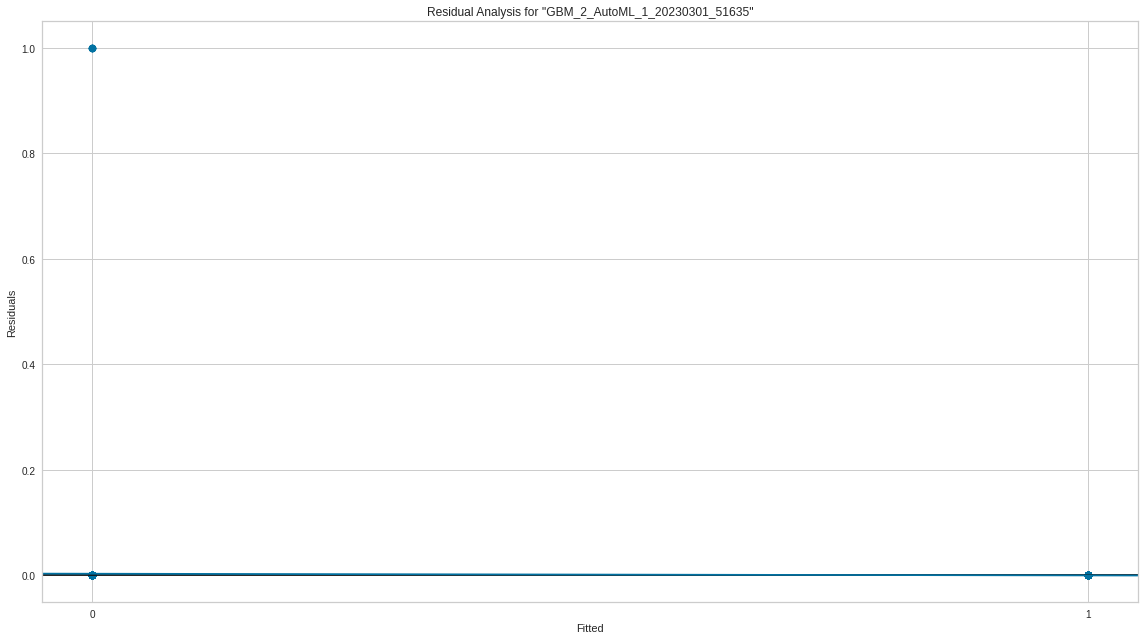

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

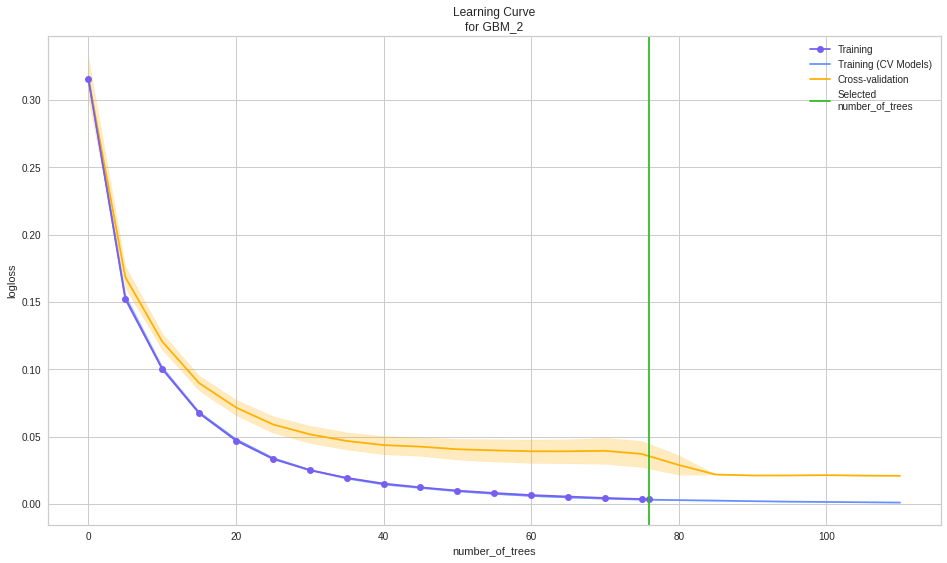

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

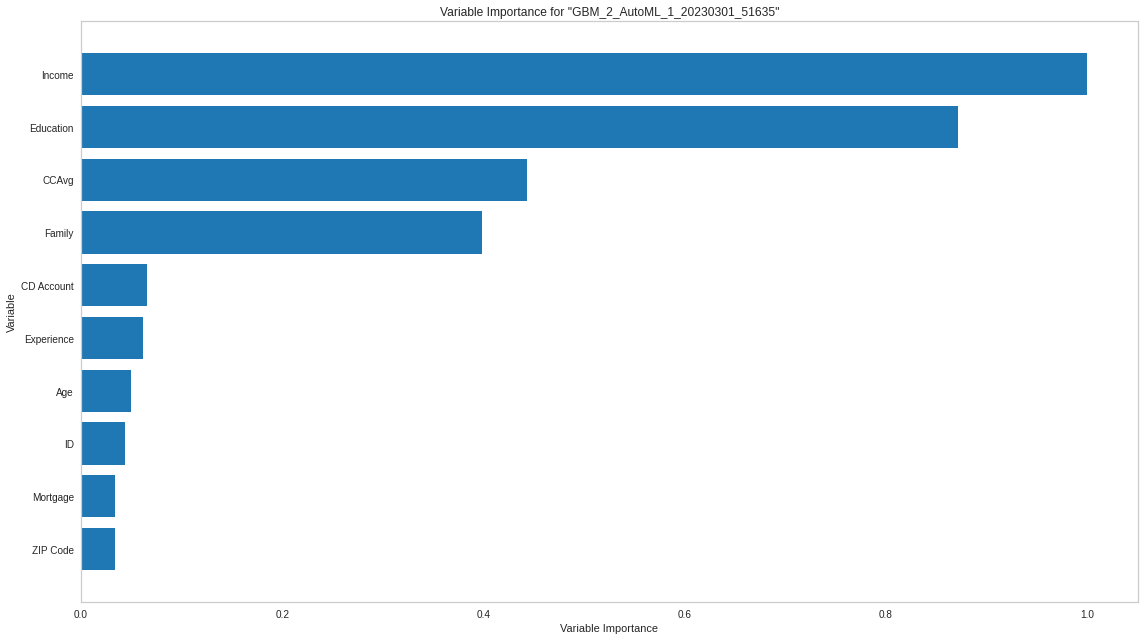

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

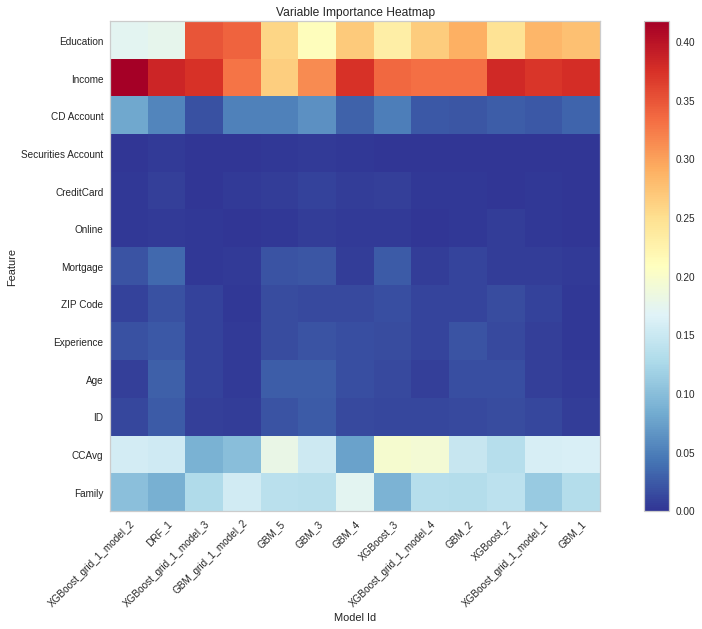

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

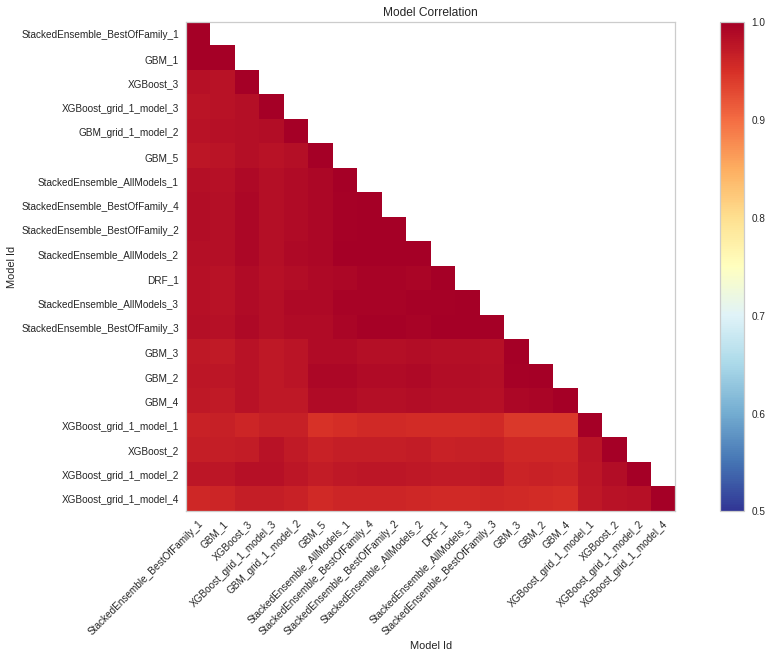

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

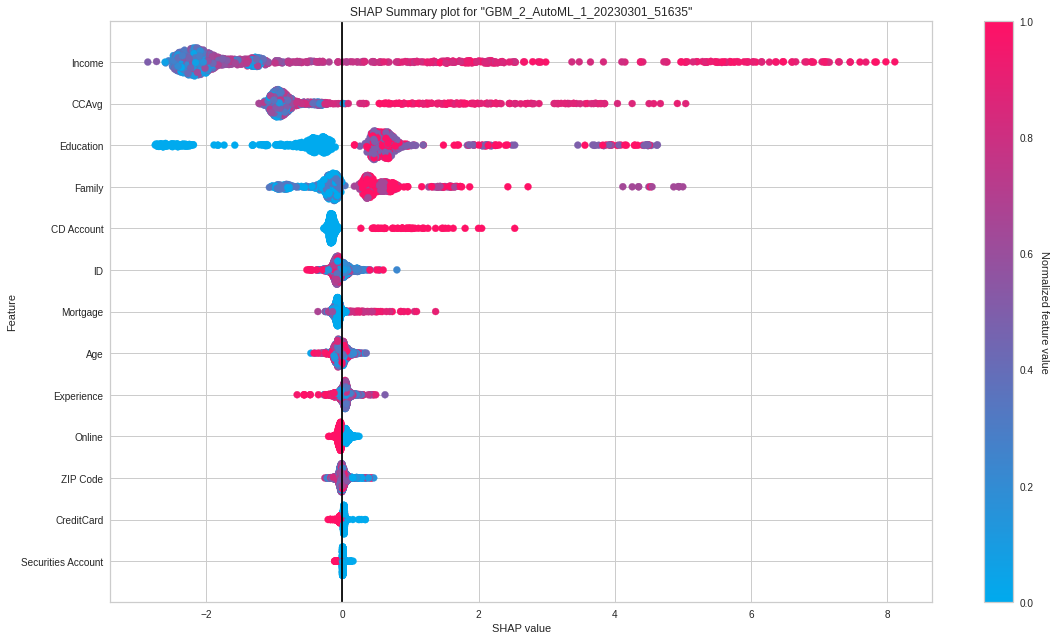

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

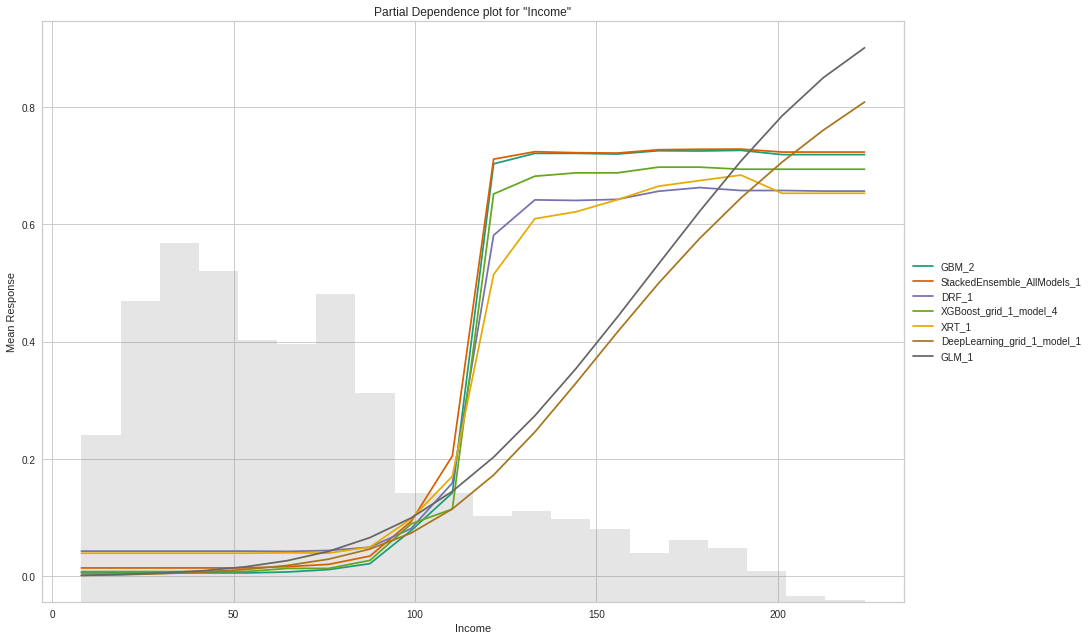

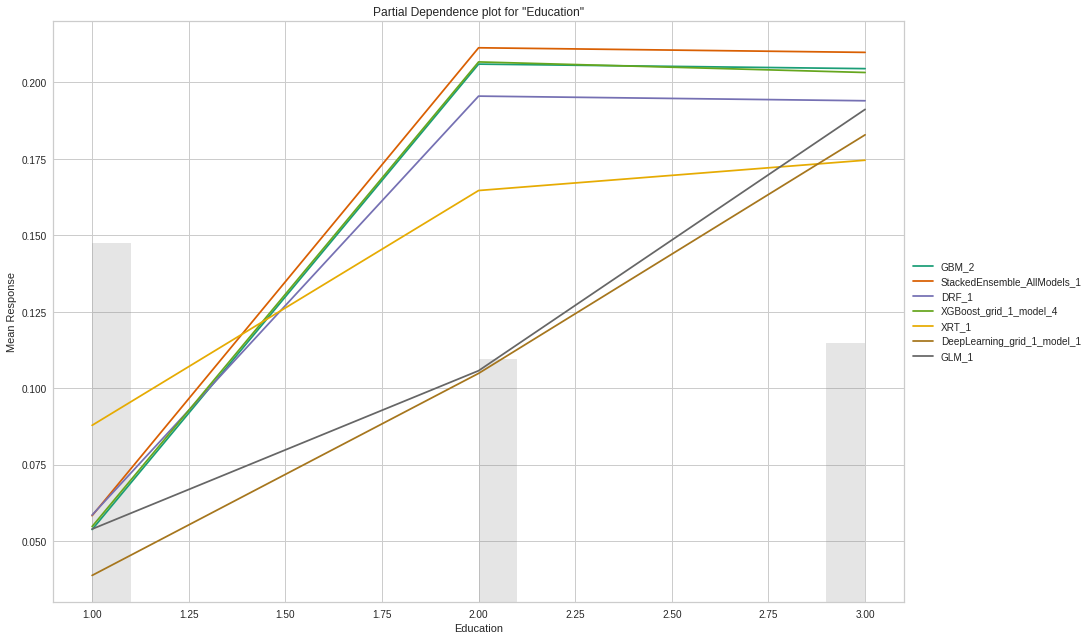

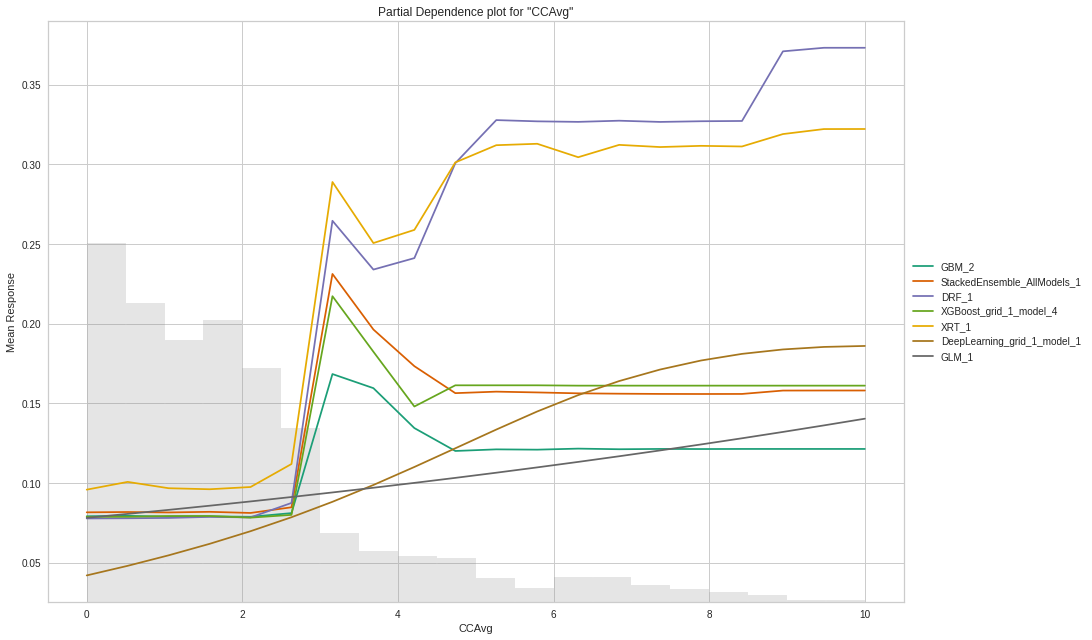

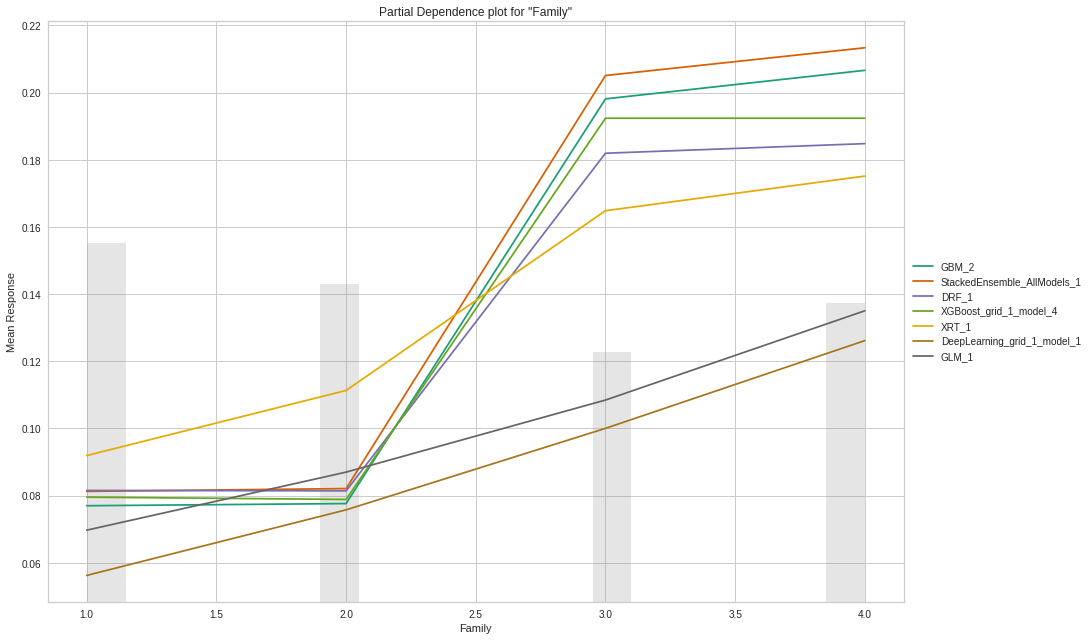

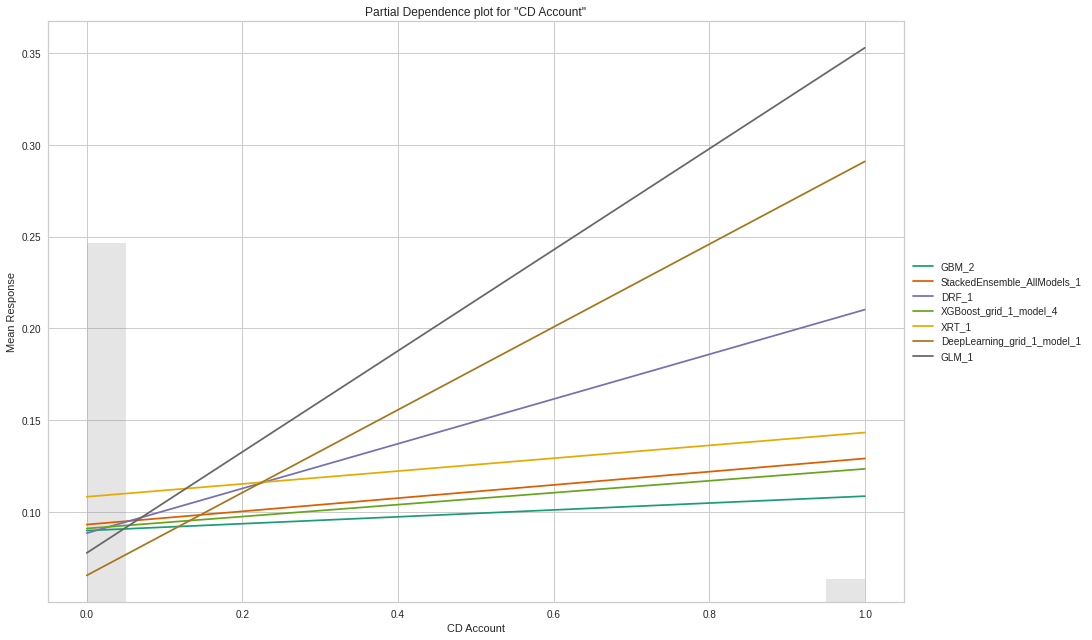

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

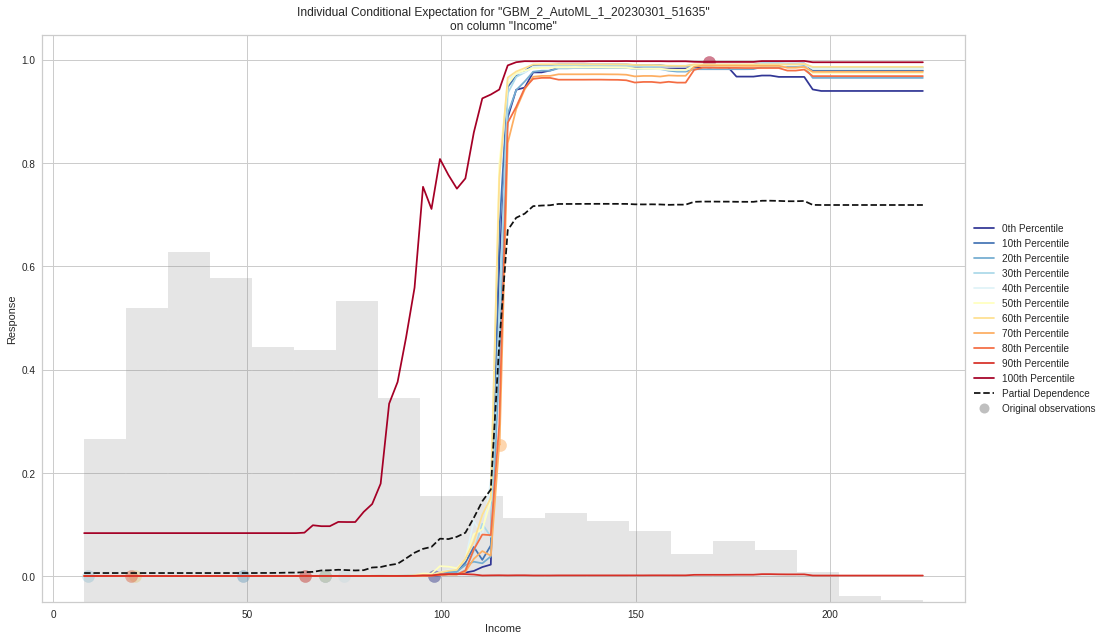

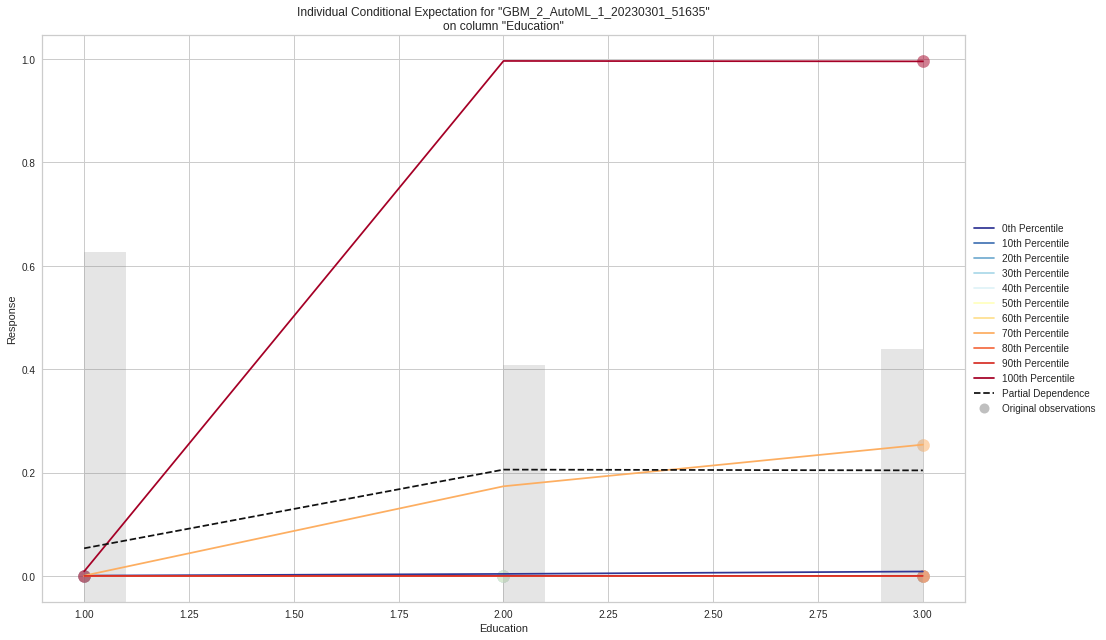

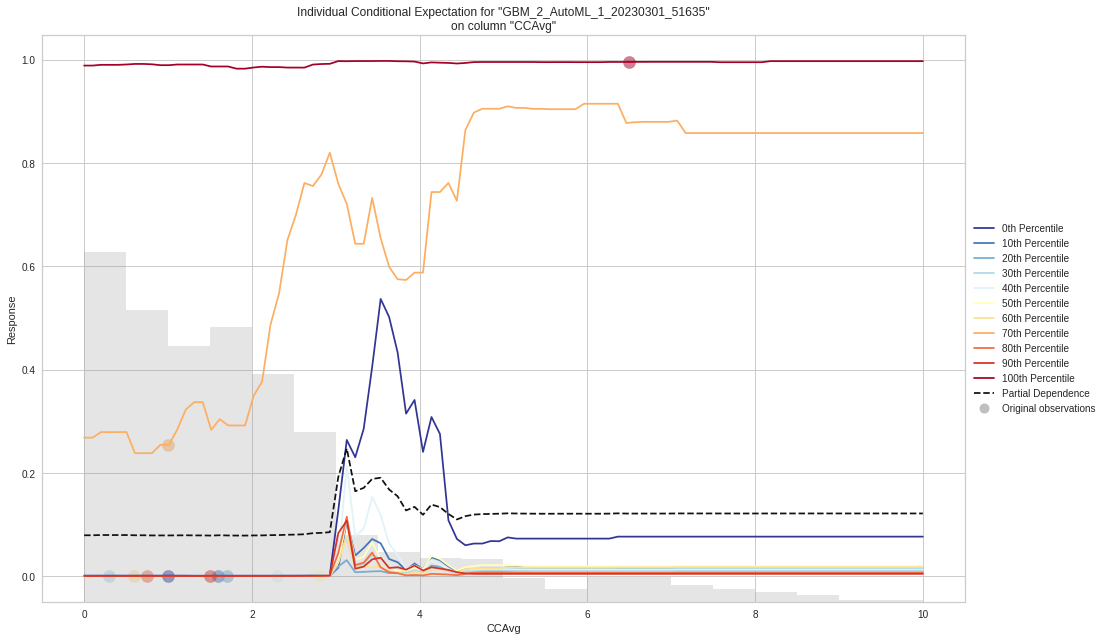

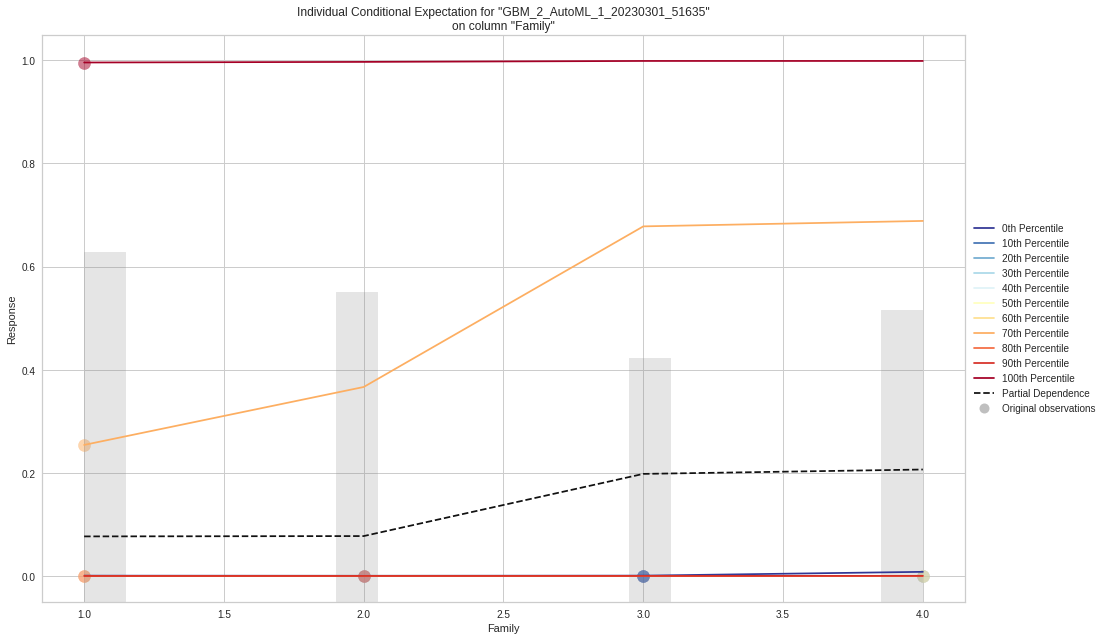

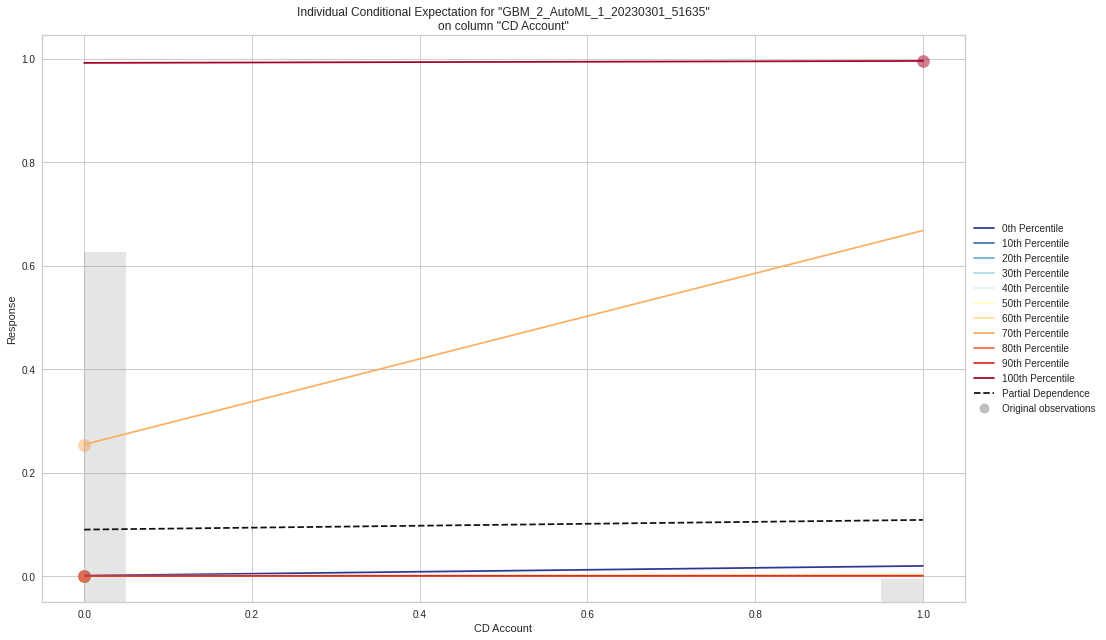

In [ ]:
hf = h2o.H2OFrame(X_train)
exa = aml.explain(hf)

Q.4

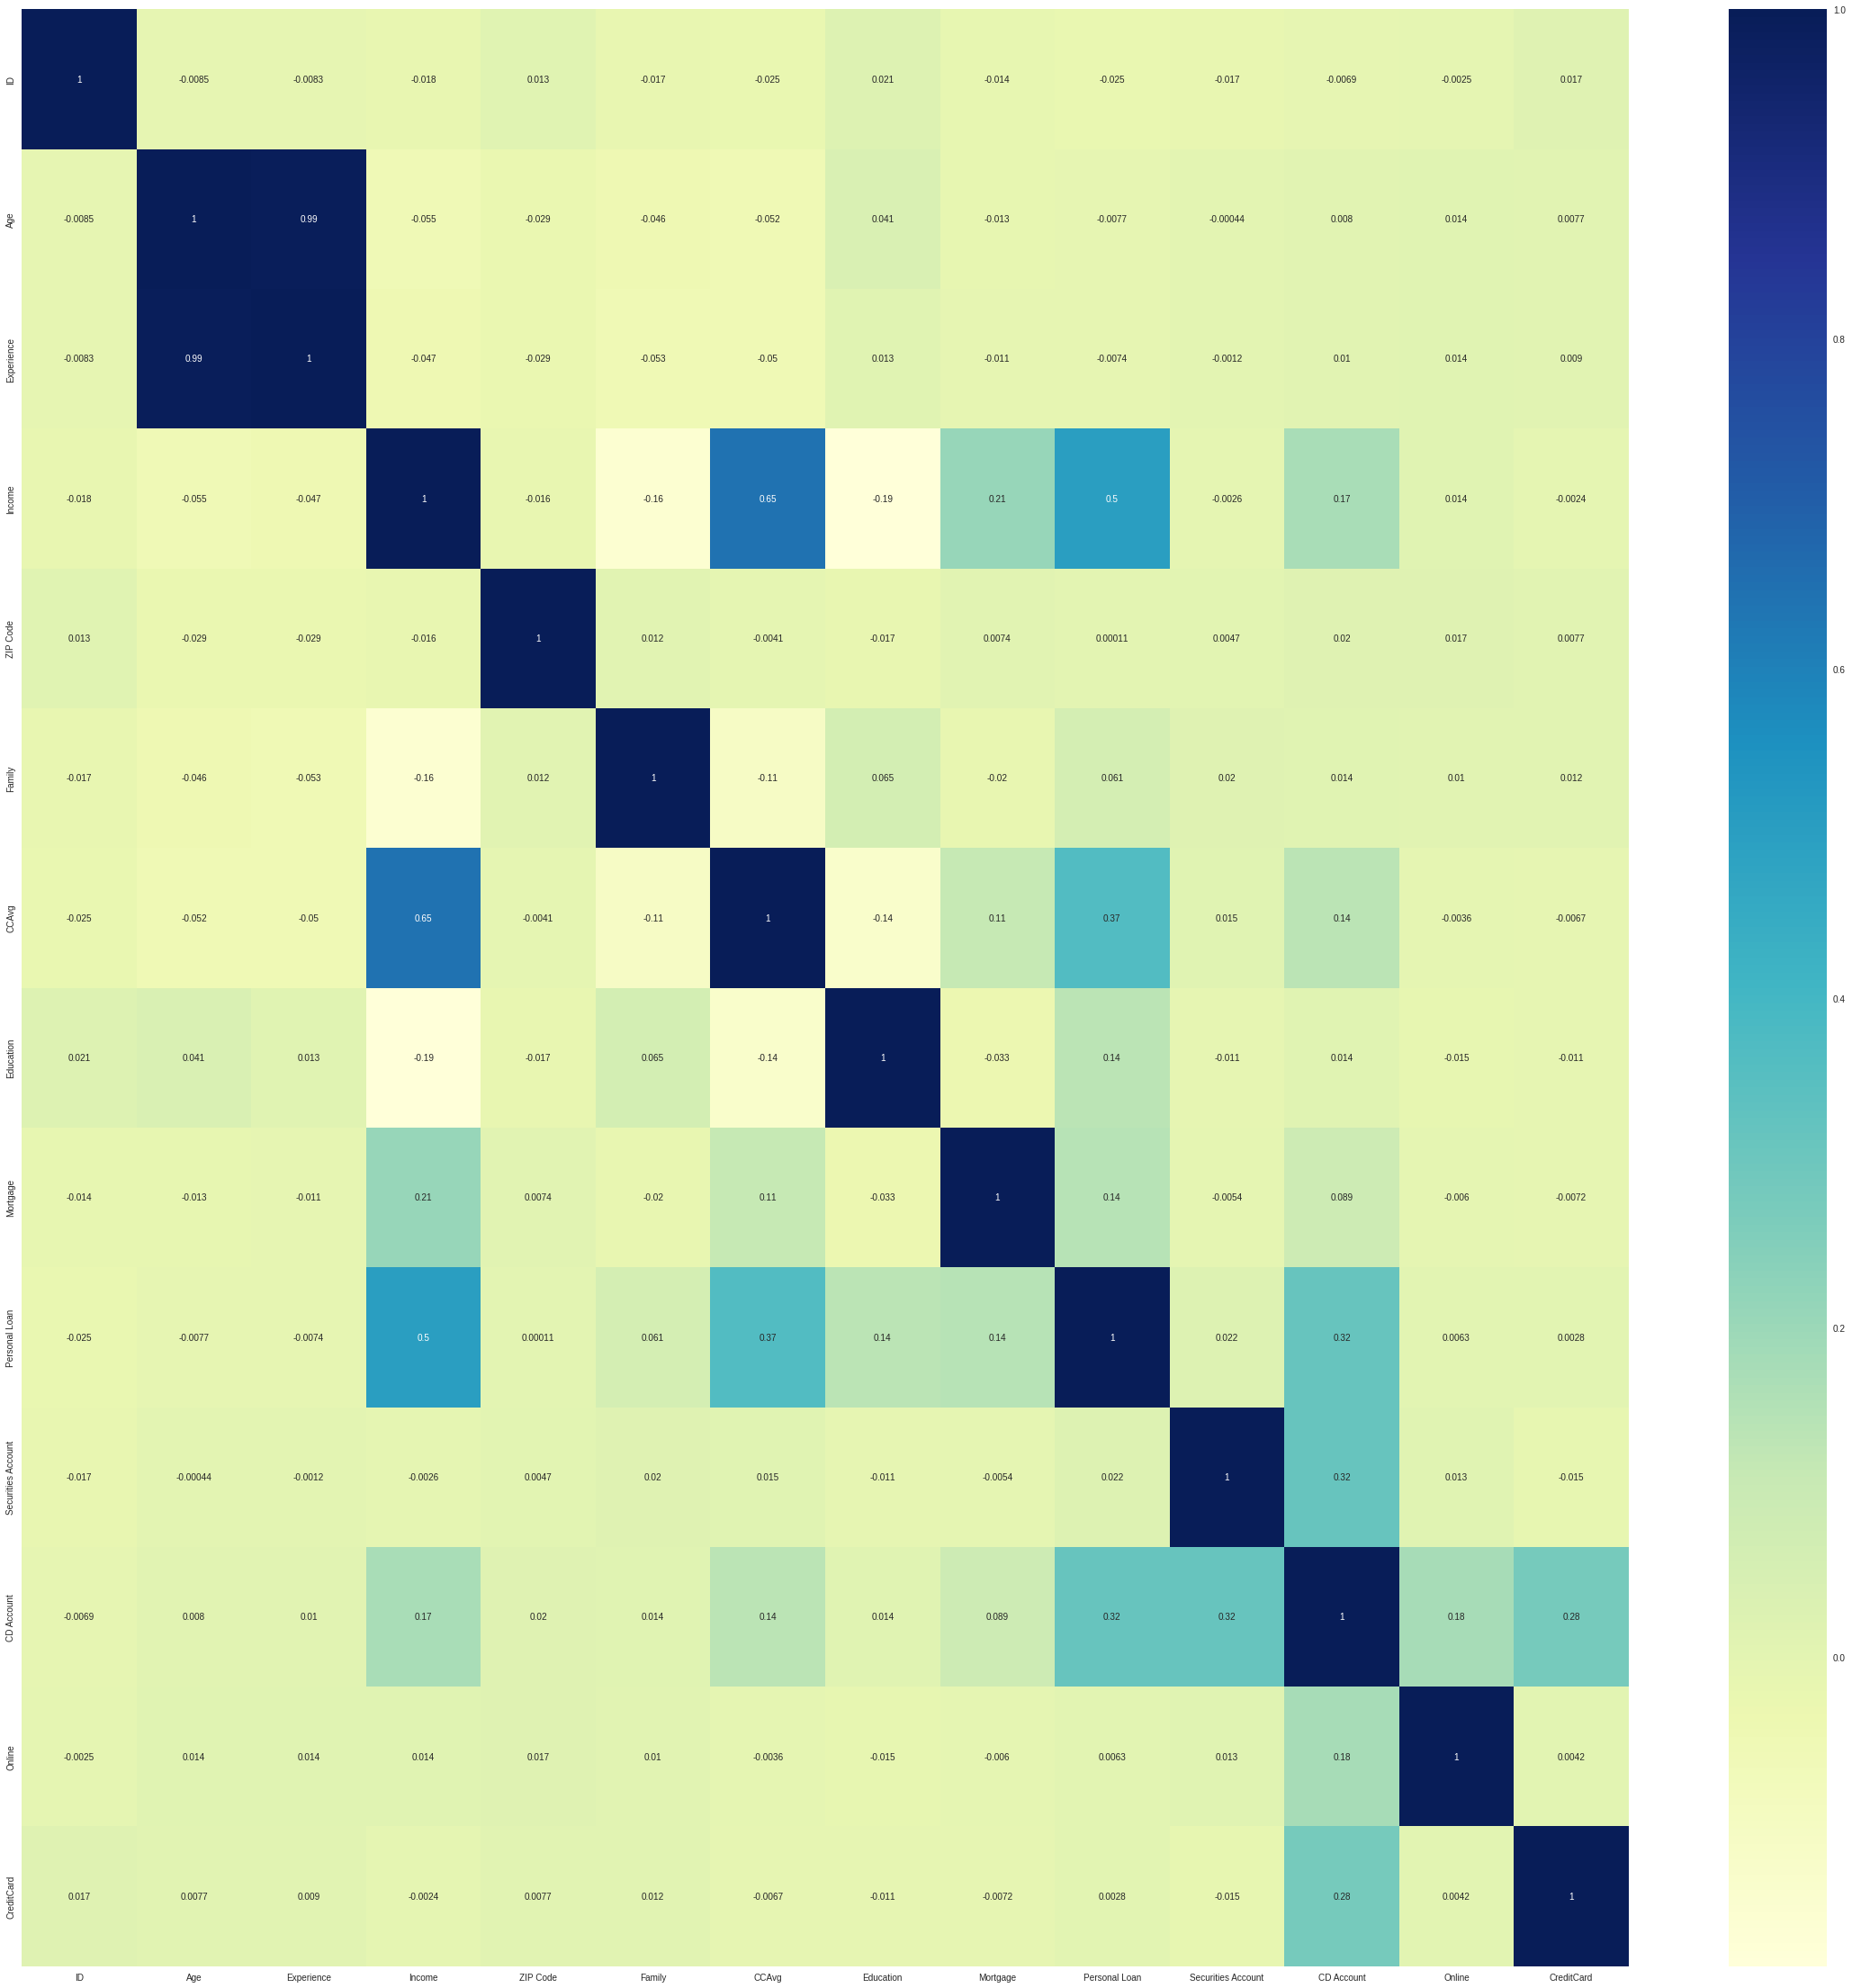

In [ ]:
plt.figure(figsize=(40, 40))
# plotting correlation heatmap
dataplot = sns.heatmap(pandas_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

Q.5


In [ ]:
X_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3186,3187,41,16,98,95192,3,1.0,1,296,0,0,0,0,0
632,633,57,32,165,94720,4,2.7,3,0,1,0,0,1,0
577,578,52,28,149,94043,2,6.8,1,0,0,0,0,1,0
2406,2407,31,7,10,92354,1,0.5,3,81,0,0,0,1,0
4686,4687,61,35,113,91741,2,2.8,1,0,0,0,0,0,0


In [ ]:
response_var = "Personal Loan"
predictor_vars = X_train[['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
        'Securities Account','CD Account','Online','CreditCard']]

In [ ]:
correlations = X_train.corr().abs()

# Rank the predictor variables by absolute correlation
ranked_predictors = correlations[response_var].sort_values(ascending=False)

# Choose the top N most significant predictor variables
N = 10
selected_vars = list(ranked_predictors.index)[:N]
print(f"Selected top {N} predictor variables:")
print(selected_vars)

# Create a new DataFrame with only the selected predictor variables and response variable
selected_data = df[selected_vars + [response_var]]

Selected top 10 predictor variables:
['Personal Loan', 'Income', 'CCAvg', 'CD Account', 'Mortgage', 'Education', 'Family', 'ID', 'Age', 'Experience']




# Q. Which independent variables are significant?



In [ ]:
hf = h2o.H2OFrame(X_train)
response = "Personal Loan"
predictors = ['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
        'Securities Account','CD Account','Online','CreditCard']
from h2o.estimators import H2OGradientBoostingEstimator
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=hf)

# Get the variable importance of each predictor
varimp = gbm.varimp()
print(varimp)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
[('Education', 618.971923828125, 1.0, 0.3887134126704529), ('Income', 568.8206176757812, 0.9189764442914059, 0.35721846982427075), ('Family', 250.6705780029297, 0.4049789147989456, 0.15742073603107473), ('CCAvg', 97.62102508544922, 0.15771478693524144, 0.06130585305819106), ('CD Account', 18.8327693939209, 0.030425886326873767, 0.011826950107642373), ('Experience', 15.237659454345703, 0.024617690831768436, 0.009569226615282828), ('ZIP Code', 8.335476875305176, 0.01346664776611056, 0.005234666610395768), ('Age', 6.764319896697998, 0.010928314575018272, 0.004247982453191603), ('Mortgage', 4.935687065124512, 0.007974007988276775, 0.0030996038577845177), ('Online', 1.359646201133728, 0.0021966201515648586, 0.0008538557154554637), ('CreditCard', 0.7647511959075928, 0.0012355183918163427, 0.00048026257050

Education, Income, Family, CCAvg , CD Account, Experience, ZIP Code, Age , Mortgage , Online , Credit Card , Securities Account are significant  independent variable.

# Q.Which hyperparameters are important?

In [ ]:
parameters = aml.leaderboard
print(parameters.params)

In [61]:
hf = h2o.H2OFrame(pandas_df)

# Define the predictor and response variables
response_var = "Personal Loan"
predictor_vars = ['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage',
        'Securities Account','CD Account','Online','CreditCard']

# Define the AutoML settings
aml = H2OAutoML(
    max_models=20,            # maximum number of models to train
    max_runtime_secs=1800,    # maximum amount of time to spend on training
    seed=12345                # random seed for reproducibility
)

# Train the models
aml.train(x=predictor_vars, y=response_var, training_frame=hf)

# Print the leaderboard (list of models ranked by performance)
leaderboard = aml.leaderboard
print(leaderboard)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
05:41:03.827: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
05:41:28.265: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


05:41:29.590: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
05:41:43.516: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, conver

In [62]:
parameters = aml.leader
print(parameters.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'StackedEnsemble_BestOfFamily_1_AutoML_2_20230301_54103', 'type': 'Key<Model>', 'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_2_20230301_54103'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_2_20230301_54103_training_Key_Frame__upload_942f0a712b0d098a8b7260fc2d654ce5.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_2_20230301_54103_training_Key_Frame__upload_942f0a712b0d098a8b7260fc2d654ce5.hex'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_2_20230301_54103_training_Key_Frame__upload_942f0a712b0d098a8b7260fc2d654ce5.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_2_20230301_54103_training_Key_Frame__upload_942f0a712b0d098a8b7260fc2d65

All these model_id,__meta,schema_version,schema_name,schema_type,name,type,URL,training_frame are important Hyperparameters.

# Q.Is the relationship significant?

In [69]:
from scipy.stats import pearsonr

corr_matrix = pandas_df.corr(method='pearson')

# print the correlation matrix
print(corr_matrix)

                          ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.008326 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994215 -0.055269 -0.029216   
Experience         -0.008326  0.994215    1.000000 -0.046574 -0.028626   
Income             -0.017695 -0.055269   -0.046574  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.028626 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.052563 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.050077  0.645984 -0.004061   
Education           0.021463  0.041334    0.013152 -0.187524 -0.017377   
Mortgage           -0.013920 -0.012539   -0.010582  0.206806  0.007383   
Personal Loan      -0.024801 -0.007726   -0.007413  0.502462  0.000107   
Securities Account -0.016972 -0.000436   -0.001232 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.010353  0.169738  0.019972   
Online             -0.002528  0.013702

R can have a value between -1 and 1. A perfect negative correlation is shown by a correlation of -1, and a perfect positive correlation is shown by a correlation of 1. No relationship exists between the movement of the two variables, as indicated by a correlation of 0.

# Conclusion

Conclusion

.R can have a value between -1 and 1. A perfect negative correlation is shown by a correlation of -1, and a perfect positive correlation is shown by a correlation of 1. No relationship exists between the movement of the two variables, as indicated by a correlation of 0.

.All these model_id,__meta,schema_version,schema_name,schema_type,name,type,URL,training_frame are important Hyperparameters.

.Education, Income, Family, CCAvg , CD Account, Experience, ZIP Code, Age , Mortgage , Online , Credit Card , Securities Account are significant independent variable.

.As the values mae, mean_residual_deviance, mse,null_deviance,r2, rsme, rsmle had increased compared to older values, hence Regularization was not helpful for this dataset.


.Features like family, Education, Mortgage,Personal Loan, Secirities Account, CD Account, Online, Credit card are not following the assumption of the model.

.Here, r2, rmse, mae these values are making sense in the model.Correlations also shows that dependent valriables are dependent on each other.

.Mortgage, Personal Loan, Securities Account, CD Account, credit card and Online works well because they have less collinearity.

References

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb


https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynb


MIT License

Copyright (c) 2023 Riddhi Vora

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.